In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.font_manager as fm
import matplotlib

pd.set_option('display.max_columns', None)

%matplotlib inline

In [20]:
train = pd.read_csv('C:/Users/user/LikeLion_AI/DACON/Parking_demand/CSV/train.csv')
test = pd.read_csv('C:/Users/user/LikeLion_AI/DACON/Parking_demand/CSV/test.csv')
sub = pd.read_csv('C:/Users/user/LikeLion_AI/DACON/Parking_demand/CSV/sample_submission.csv')
age = pd.read_csv('C:/Users/user/LikeLion_AI/DACON/Parking_demand/CSV/age_gender_info.csv')

train.shape, test.shape, sub.shape, age.shape

((2952, 15), (1022, 14), (150, 2), (16, 23))

### 지하철, 버스정류장 이름 바꾸기

In [21]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수']

### 새로운 feature 추가

In [22]:
train['주차면수/총세대수'] = train['단지내주차면수']/train['총세대수']
train['공가수/주차면수'] = train['공가수']/train['단지내주차면수']
train['총임대세대수'] = train.groupby('단지코드')['전용면적별세대수'].transform(sum)
train['등록차량수/전용면적'] = train['등록차량수']/train['전용면적']
train['등록차량수/총임대세대수'] = train['등록차량수']/train['총임대세대수']
train['log_등록차량수'] = np.log1p(train['등록차량수'])

train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수,주차면수/총세대수,공가수/주차면수,총임대세대수,등록차량수/전용면적,등록차량수/총임대세대수,log_등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,1.583333,0.026667,900,25.553877,1.127778,6.923629
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,1.583333,0.026667,900,25.553877,1.127778,6.923629
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,1.583333,0.026667,900,19.545542,1.127778,6.923629
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,1.583333,0.026667,900,19.545542,1.127778,6.923629
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,1.583333,0.026667,900,19.545542,1.127778,6.923629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0,0.694561,0.042169,239,2.967480,0.610879,4.990433
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,0.694561,0.042169,239,2.858262,0.610879,4.990433
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,0.694561,0.042169,239,2.822347,0.610879,4.990433
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,0.694561,0.042169,239,2.809854,0.610879,4.990433


In [23]:
test['주차면수/총세대수'] = test['단지내주차면수']/test['총세대수']
test['공가수/주차면수'] = test['공가수']/test['단지내주차면수']
test['총임대세대수'] = test.groupby('단지코드')['전용면적별세대수'].transform(sum)

test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,주차면수/총세대수,공가수/주차면수,총임대세대수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0,0.905836,0.020498,754
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0,0.905836,0.020498,754
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0,0.905836,0.020498,754
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0,0.905836,0.020498,754
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0,0.905836,0.020498,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0,0.691852,0.081370,670
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0,0.785340,0.150000,378
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0,0.785340,0.150000,378
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0,0.785340,0.150000,378


### 오류 처리

In [25]:
drop_danji = ['C2085', 'C1397', 'C2431', 'C1649', 'C1036', 
              'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']    # 총 12개

train.drop('level_0', axis=1, inplace=True)

for code in drop_danji:
    train = train[train['단지코드'] != code].reset_index()

ValueError: cannot insert level_0, already exists

### 지하철 결측치 처리

In [28]:
train['지하철'] = train['지하철'].fillna(0)
test['지하철'] = test['지하철'].fillna(0)

### 버스정류장 결측치 처리

In [29]:
train['버스정류장'] = train['버스정류장'].fillna(2)

### 자격유형 결측치 처리

In [30]:
test.loc[196, '자격유형'] = 'A'
test.loc[258, '자격유형'] = 'C'

### QCUT

In [31]:
train['qcut_총세대수'] = pd.qcut(train['총세대수'], 5, labels=False)
train['qcut_단지내주차면수'] = pd.qcut(train['단지내주차면수'], 5, labels=False)
train['qcut_전용면적별세대수'] = pd.qcut(train['전용면적별세대수'], 5, labels=False)

In [32]:
test['qcut_총세대수'] = pd.qcut(test['총세대수'], 5, labels=False)
test['qcut_단지내주차면수'] = pd.qcut(test['단지내주차면수'], 5, labels=False)
test['qcut_전용면적별세대수'] = pd.qcut(test['전용면적별세대수'], 5, labels=False)

In [11]:
train.isnull().sum(), test.isnull().sum()

(단지코드               0
 총세대수               0
 임대건물구분             0
 지역                 0
 공급유형               0
 전용면적               0
 전용면적별세대수           0
 공가수                0
 자격유형               0
 임대보증금            569
 임대료              569
 지하철                0
 버스정류장              0
 단지내주차면수            0
 등록차량수              0
 주차면수/총세대수          0
 공가수/주차면수           0
 총임대세대수             0
 등록차량수/전용면적         0
 등록차량수/총임대세대수       0
 log_등록차량수          0
 qcut_총세대수          0
 qcut_단지내주차면수       0
 qcut_전용면적별세대수      0
 dtype: int64,
 단지코드               0
 총세대수               0
 임대건물구분             0
 지역                 0
 공급유형               0
 전용면적               0
 전용면적별세대수           0
 공가수                0
 자격유형               0
 임대보증금            180
 임대료              180
 지하철                0
 버스정류장              0
 단지내주차면수            0
 주차면수/총세대수          0
 공가수/주차면수           0
 총임대세대수             0
 qcut_총세대수          0
 qcut_단지내주차면수       0
 qcut_전용면적별세대수      0
 dtype: int64)

### Age 정보 추가

라벨 인코딩보다 먼저 해야 됨

In [33]:
age.index = age['지역']
age.drop('지역', axis=1, inplace=True)

In [34]:
## train1, test1 : 라벨인코딩 + age정보 같이 된 데이터프레임
train1 = train.copy()
test1 = test.copy()

In [36]:
age_df = pd.DataFrame(columns = ['10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)',
       '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)',
       '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)',
       '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)'])

for i in range(train.shape[0]):
    area = train.loc[i, '지역']
    age_df.loc[i] = age.loc[area]
    
age_df

,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
2,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
3,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
4,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
2934,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
2935,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
2936,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [37]:
train1 = pd.concat([train1, age_df], axis=1)
train1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수,주차면수/총세대수,공가수/주차면수,총임대세대수,등록차량수/전용면적,등록차량수/총임대세대수,log_등록차량수,qcut_총세대수,qcut_단지내주차면수,qcut_전용면적별세대수,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,1.583333,0.026667,900,25.553877,1.127778,6.923629,3,4,3,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,1.583333,0.026667,900,25.553877,1.127778,6.923629,3,4,1,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,1.583333,0.026667,900,19.545542,1.127778,6.923629,3,4,4,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,1.583333,0.026667,900,19.545542,1.127778,6.923629,3,4,1,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,1.583333,0.026667,900,19.545542,1.127778,6.923629,3,4,2,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0,0.694561,0.042169,239,2.967480,0.610879,4.990433,0,0,1,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
2934,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,0.694561,0.042169,239,2.858262,0.610879,4.990433,0,0,1,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
2935,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,0.694561,0.042169,239,2.822347,0.610879,4.990433,0,0,1,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
2936,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,0.694561,0.042169,239,2.809854,0.610879,4.990433,0,0,3,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [38]:
age_df = pd.DataFrame(columns = ['10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)',
       '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)',
       '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)',
       '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)'])

for i in range(test1.shape[0]):
    area = test1.loc[i, '지역']
    age_df.loc[i] = age.loc[area]
    
age_df

,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
1,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
2,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
3,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
1018,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
1019,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
1020,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [39]:
test1 = pd.concat([test1, age_df], axis=1)
test1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,주차면수/총세대수,공가수/주차면수,총임대세대수,qcut_총세대수,qcut_단지내주차면수,qcut_전용면적별세대수,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0,0.905836,0.020498,754,2,3,3,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0,0.905836,0.020498,754,2,3,1,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0,0.905836,0.020498,754,2,3,3,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0,0.905836,0.020498,754,2,3,3,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0,0.905836,0.020498,754,2,3,2,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0,0.691852,0.081370,670,2,2,3,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0,0.785340,0.150000,378,0,1,3,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0,0.785340,0.150000,378,0,1,1,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0,0.785340,0.150000,378,0,1,4,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


### LabelEncoding

In [40]:
## 우선 모두 진행
from sklearn.preprocessing import LabelEncoder

cate = ['임대건물구분', '지역', '자격유형', '공급유형']

encoder = LabelEncoder()

for one in cate:
    encoder.fit(train1[one])
    train1[one] = encoder.transform(train1[one])
    print(encoder.classes_)
    
    test1[one] = encoder.transform(test1[one])
    print(encoder.classes_)

['상가' '아파트']
['상가' '아파트']
['강원도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시'
 '세종특별자치시' '울산광역시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도']
['강원도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시'
 '세종특별자치시' '울산광역시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']
['공공분양' '공공임대(10년)' '공공임대(50년)' '공공임대(5년)' '공공임대(분납)' '국민임대' '영구임대' '임대상가'
 '장기전세' '행복주택']
['공공분양' '공공임대(10년)' '공공임대(50년)' '공공임대(5년)' '공공임대(분납)' '국민임대' '영구임대' '임대상가'
 '장기전세' '행복주택']


In [19]:
train1.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', '등록차량수', '주차면수/총세대수',
       '공가수/주차면수', '총임대세대수', '등록차량수/전용면적', '등록차량수/총임대세대수', 'log_등록차량수',
       'qcut_총세대수', 'qcut_단지내주차면수', 'qcut_전용면적별세대수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)'],
      dtype='object')

In [20]:
test1.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', '주차면수/총세대수',
       '공가수/주차면수', '총임대세대수', 'qcut_총세대수', 'qcut_단지내주차면수', 'qcut_전용면적별세대수',
       '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)',
       '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)',
       '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)',
       '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)'],
      dtype='object')

In [25]:
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [26]:
train_corr = train1.corr()

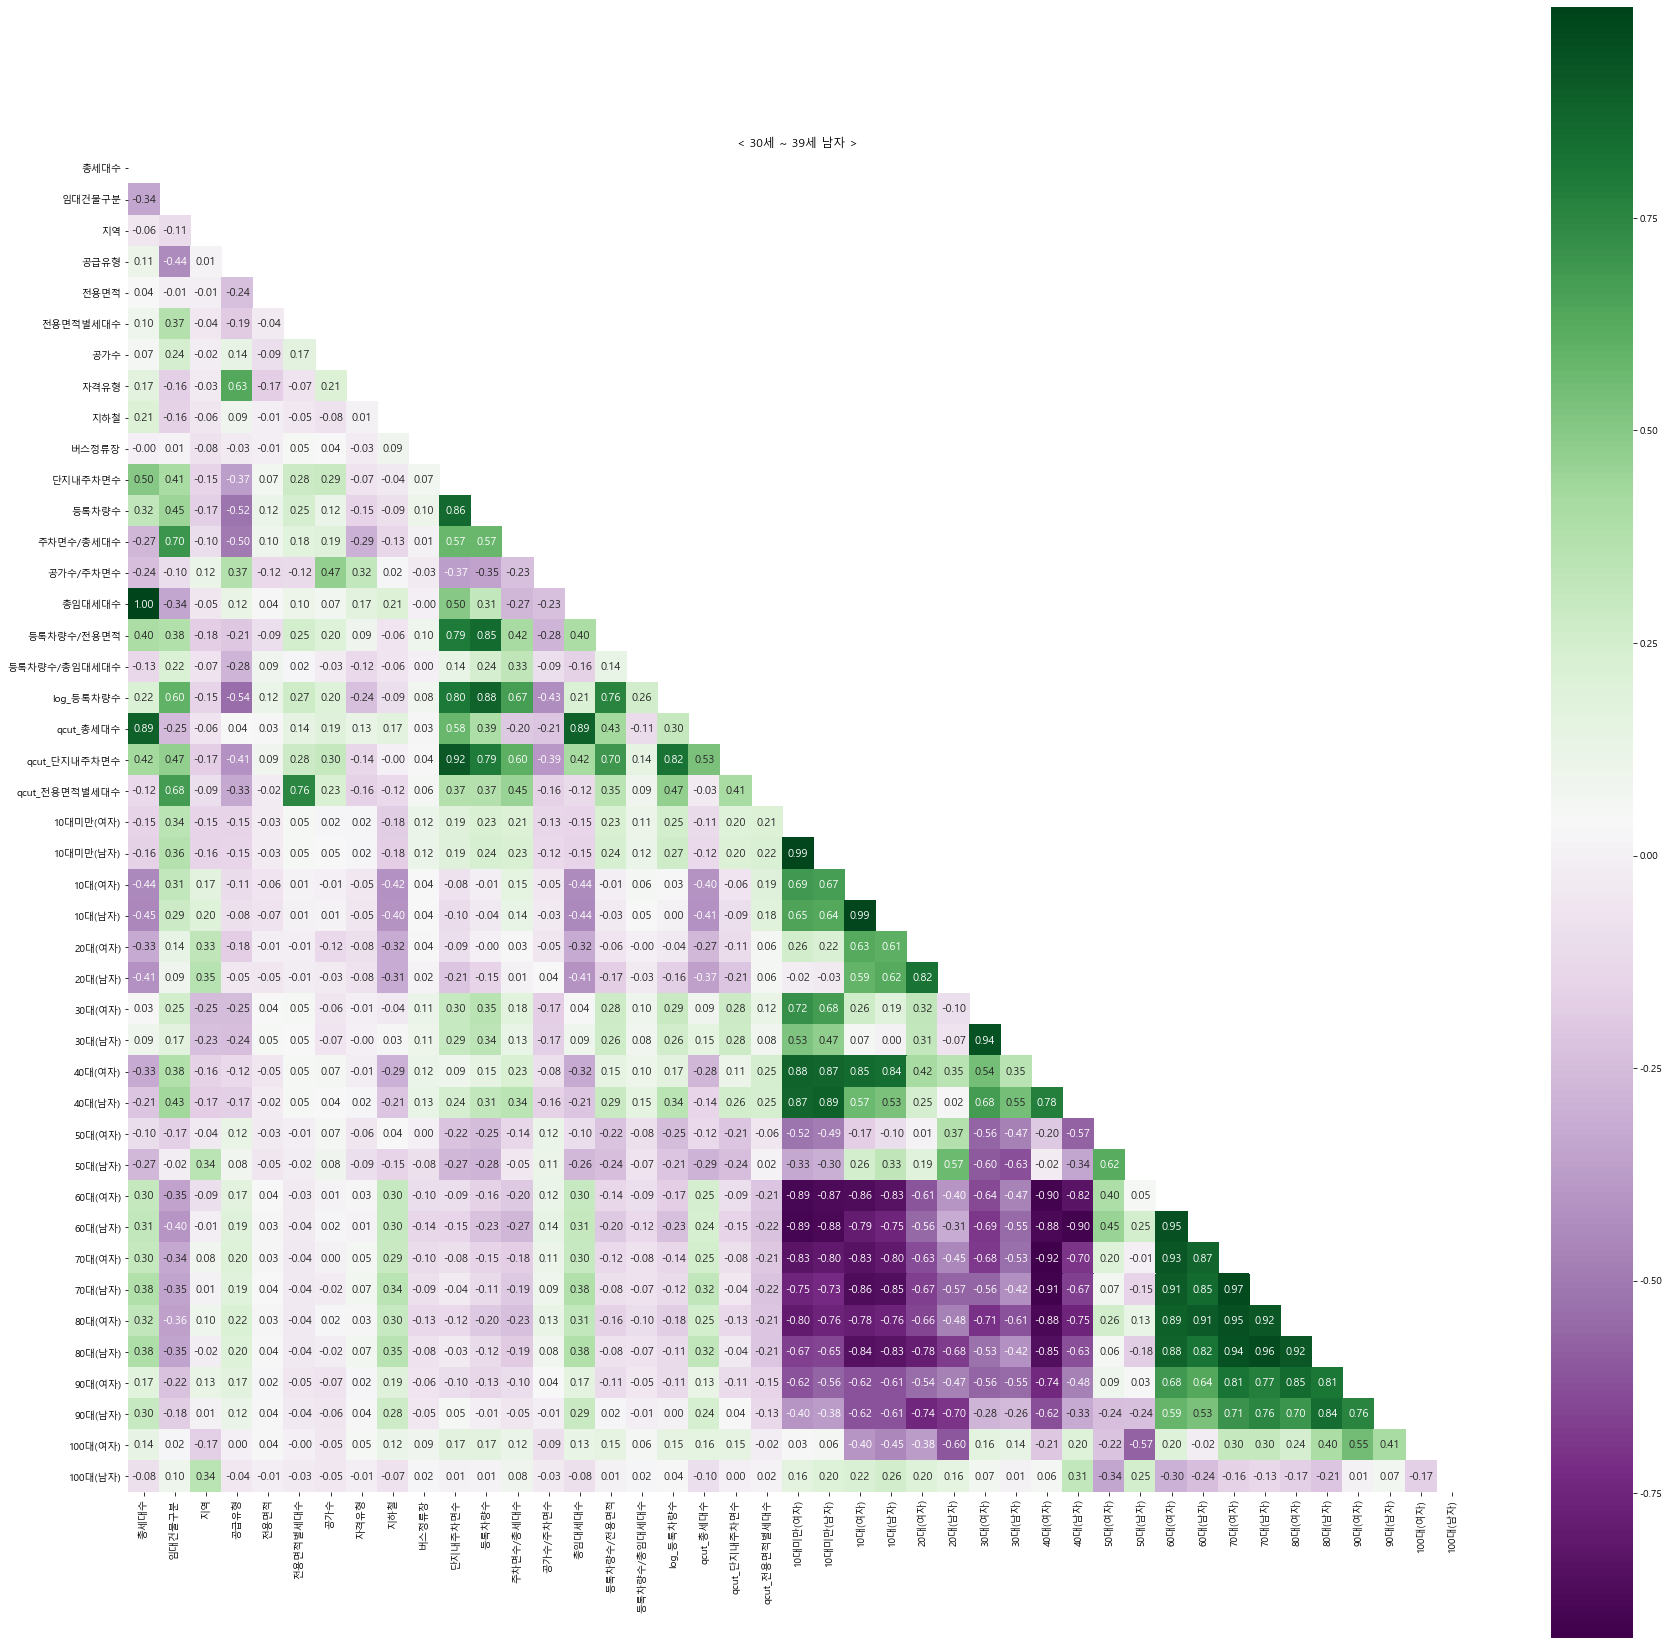

In [29]:
plt.figure(figsize=(30,30), facecolor='white')

mask = np.zeros_like(train_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(train_corr, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='PRGn', square=True)
plt.title('< 30세 ~ 39세 남자 >')
plt.show()

In [39]:
train_corr['log_등록차량수'].sort_values(ascending=False)

log_등록차량수        1.000000
등록차량수            0.881440
qcut_단지내주차면수     0.824770
단지내주차면수          0.802945
등록차량수/전용면적       0.761847
주차면수/총세대수        0.672108
임대건물구분           0.597790
qcut_전용면적별세대수    0.468498
40대(남자)          0.338782
qcut_총세대수        0.303367
30대(여자)          0.287500
전용면적별세대수         0.270845
10대미만(남자)        0.265855
등록차량수/총임대세대수     0.263040
30대(남자)          0.260292
10대미만(여자)        0.249589
총세대수             0.217766
총임대세대수           0.214812
공가수              0.198071
40대(여자)          0.170085
100대(여자)         0.148328
전용면적             0.116036
버스정류장            0.077806
100대(남자)         0.035079
10대(여자)          0.031773
10대(남자)          0.002017
90대(남자)          0.001706
20대(여자)         -0.042973
지하철             -0.091784
90대(여자)         -0.114130
80대(남자)         -0.114595
70대(남자)         -0.116646
70대(여자)         -0.140429
지역              -0.154551
20대(남자)         -0.164695
60대(여자)         -0.171747
80대(여자)         -0.179095
50대(남자)         -0.214199
60대(남자)     

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option('display.max_columns', None)

%matplotlib inline

In [41]:
train2 = train1.copy()
test2 = test1.copy()

train2['type'] = 'train'
test2['type'] = 'test'

all_df = pd.concat([train2, test2], axis=0)

In [45]:
train1.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', '등록차량수', '주차면수/총세대수',
       '공가수/주차면수', '총임대세대수', '등록차량수/전용면적', '등록차량수/총임대세대수', 'log_등록차량수',
       'qcut_총세대수', 'qcut_단지내주차면수', 'qcut_전용면적별세대수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)'],
      dtype='object')

In [60]:
fig = px.scatter(all_df, x='전용면적별세대수', y='주차면수/총세대수' ,color="type", trendline='ols', 
          hover_data=['단지코드'], marginal_x='box', marginal_y='box')
fig.update_layout(width=600,
                  height=600,
                  hovermode='closest')

fig.show()

- 로그 등록차량수 피처
```
qcut_단지내주차면수, 주차면수/총세대수, 임대건물구분, 
qcut_전용면적별세대수, 40대(남자), qcut_총세대수, 30대(여자), 
전용면적별세대수, 공급유형, 공가수/주차면수, 50대(여자), 자격유형
```

In [55]:
train1[train1['단지코드']=='C1859']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수,주차면수/총세대수,공가수/주차면수,총임대세대수,등록차량수/전용면적,등록차량수/총임대세대수,log_등록차량수,qcut_총세대수,qcut_단지내주차면수,qcut_전용면적별세대수,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
262,C1859,2424,1,6,6,26.37,10,1.0,2,5787000,79980,1.0,4.0,487.0,116.0,0.200908,0.002053,2424,4.398938,0.047855,4.762174,4,2,1,0.028197,0.029092,0.04049,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.05101,0.037143,0.032455,0.013751,0.006494,0.00174,0.000298,0.000066
263,C1859,2424,1,6,6,26.37,10,1.0,2,5787000,79980,1.0,4.0,487.0,116.0,0.200908,0.002053,2424,4.398938,0.047855,4.762174,4,2,1,0.028197,0.029092,0.04049,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.05101,0.037143,0.032455,0.013751,0.006494,0.00174,0.000298,0.000066
264,C1859,2424,1,6,6,31.32,478,1.0,2,6873000,94990,1.0,4.0,487.0,116.0,0.200908,0.002053,2424,3.703704,0.047855,4.762174,4,2,4,0.028197,0.029092,0.04049,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.05101,0.037143,0.032455,0.013751,0.006494,0.00174,0.000298,0.000066
265,C1859,2424,1,6,6,52.74,26,1.0,2,11574000,159960,1.0,4.0,487.0,116.0,0.200908,0.002053,2424,2.199469,0.047855,4.762174,4,2,1,0.028197,0.029092,0.04049,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.05101,0.037143,0.032455,0.013751,0.006494,0.00174,0.000298,0.000066
266,C1859,2424,0,6,7,38.00,1,1.0,3,NaN,NaN,1.0,4.0,487.0,116.0,0.200908,0.002053,2424,3.052632,0.047855,4.762174,4,2,0,0.028197,0.029092,0.04049,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.05101,0.037143,0.032455,0.013751,0.006494,0.00174,0.000298,0.000066
267,C1859,2424,0,6,7,38.00,1,1.0,3,NaN,NaN,1.0,4.0,487.0,116.0,0.200908,0.002053,2424,3.052632,0.047855,4.762174,4,2,0,0.028197,0.029092,0.04049,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.05101,0.037143,0.032455,0.013751,0.006494,0.00174,0.000298,0.000066
268,C1859,2424,0,6,7,31.84,1,1.0,3,NaN,NaN,1.0,4.0,487.0,116.0,0.200908,0.002053,2424,3.643216,0.047855,4.762174,4,2,0,0.028197,0.029092,0.04049,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.05101,0.037143,0.032455,0.013751,0.006494,0.00174,0.000298,0.000066
269,C1859,2424,0,6,7,31.84,1,1.0,3,NaN,NaN,1.0,4.0,487.0,116.0,0.200908,0.002053,2424,3.643216,0.047855,4.762174,4,2,0,0.028197,0.029092,0.04049,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.05101,0.037143,0.032455,0.013751,0.006494,0.00174,0.000298,0.000066
270,C1859,2424,0,6,7,31.84,1,1.0,3,NaN,NaN,1.0,4.0,487.0,116.0,0.200908,0.002053,2424,3.643216,0.047855,4.762174,4,2,0,0.028197,0.029092,0.04049,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.05101,0.037143,0.032455,0.013751,0.006494,0.00174,0.000298,0.000066
271,C1859,2424,0,6,7,31.84,1,1.0,3,NaN,NaN,1.0,4.0,487.0,116.0,0.200908,0.002053,2424,3.643216,0.047855,4.762174,4,2,0,0.028197,0.029092,0.04049,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.05101,0.037143,0.032455,0.013751,0.006494,0.00174,0.000298,0.000066


```
x='전용면적별세대수', y='주차면수/총세대수'
```
전용면적별세대수 : 1865 -> 261행 삭제

In [54]:
train1.drop(261, axis=0, inplace=True)

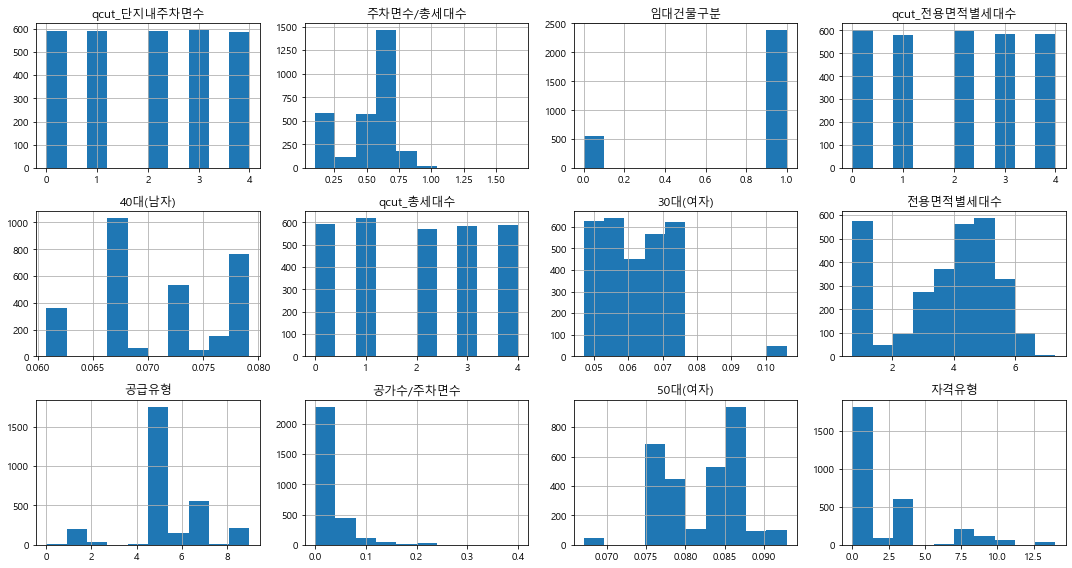

In [69]:
sel = ['qcut_단지내주차면수', '주차면수/총세대수', '임대건물구분', 
'qcut_전용면적별세대수', '40대(남자)', 'qcut_총세대수', '30대(여자)', 
'전용면적별세대수', '공급유형', '공가수/주차면수', '50대(여자)', '자격유형']

plt.figure(figsize=(15, 8), facecolor='white')

for idx, one in enumerate(sel):
    plt.subplot(3, 4, idx+1)
    plt.hist(train3[one])
    plt.grid()
    plt.title(f'{one}')
    plt.tight_layout()
    
plt.show()

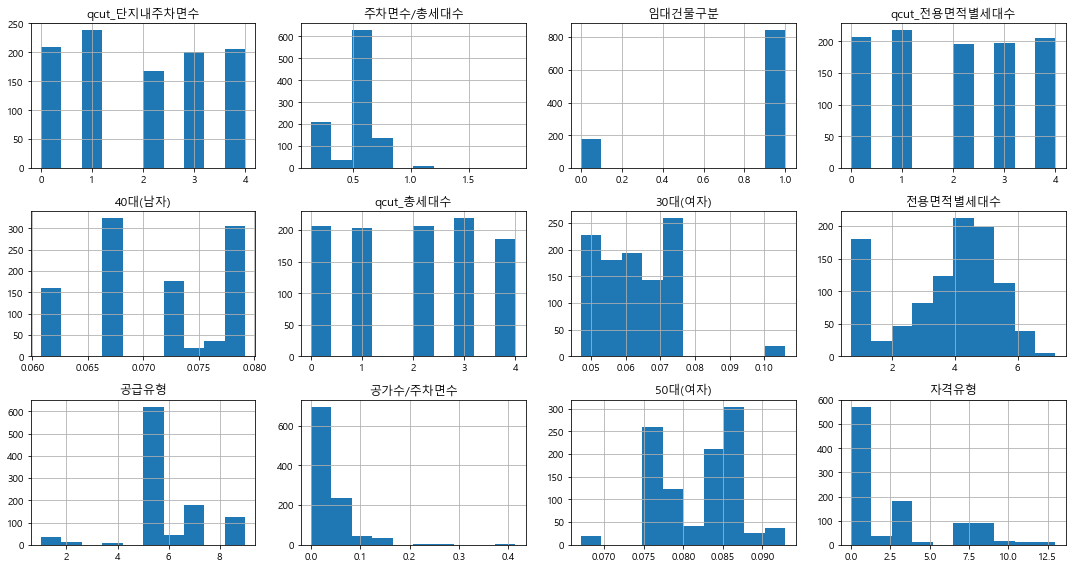

In [70]:
sel = ['qcut_단지내주차면수', '주차면수/총세대수', '임대건물구분', 
'qcut_전용면적별세대수', '40대(남자)', 'qcut_총세대수', '30대(여자)', 
'전용면적별세대수', '공급유형', '공가수/주차면수', '50대(여자)', '자격유형']

plt.figure(figsize=(15, 8), facecolor='white')

for idx, one in enumerate(sel):
    plt.subplot(3, 4, idx+1)
    plt.hist(test3[one])
    plt.grid()
    plt.title(f'{one}')
    plt.tight_layout()
    
plt.show()

In [42]:
train3 = train1.copy()
test3 = test1.copy()

sel = ['주차면수/총세대수', '전용면적별세대수']

for i in sel:
    train3[i] = np.log1p(train3[i])
    test3[i] = np.log1p(test3[i])

## 모델 학습

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
import lightgbm as lgb

In [45]:
train1.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', '등록차량수', '주차면수/총세대수',
       '공가수/주차면수', '총임대세대수', '등록차량수/전용면적', '등록차량수/총임대세대수', 'log_등록차량수',
       'qcut_총세대수', 'qcut_단지내주차면수', 'qcut_전용면적별세대수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)'],
      dtype='object')

In [47]:
sel = ['단지내주차면수', '주차면수/총세대수', '임대건물구분', '지역', '전용면적', '총임대세대수',
'전용면적별세대수', '40대(남자)', '총세대수', '30대(여자)', '버스정류장',
'공급유형', '공가수/주차면수', '50대(여자)', '자격유형']

X = train3[sel]
y = train3['log_등록차량수']

# 최종 모델로 최종 결과 뽑아주기 위한 것
test_X = test3[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [48]:
hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7250136792694301, 
                   'is_unbalance': False, 
                   'learning_rate': 0.05,
                   'min_child_samples': 20, 
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 5000}

In [ ]:
%%time

LGB = lgb.LGBMRegressor(**hyperparameters)
LGB.fit(X_train, y_train)

score = cross_val_score(LGB, X_train, y_train, 
                        cv=5, scoring="neg_mean_absolute_error")


m_score = np.abs(score.mean())  # 절대값
print("LightGBM Score : {}".format(m_score))  # 점수

pred = LGB.predict(test_X)
pred[0:10]

In [82]:
np.expm1(pred)

array([657.22728828, 667.4069462 , 656.70155995, ..., 202.05183204,
       206.47606308, 201.6901908 ])

In [83]:
test3['등록차량수'] = np.expm1(pred)
test3['단지별차량수평균'] = test3.groupby('단지코드')['등록차량수'].transform(np.mean)

test_new = test3.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,주차면수/총세대수,공가수/주차면수,총임대세대수,qcut_총세대수,qcut_단지내주차면수,qcut_전용면적별세대수,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),등록차량수,단지별차량수평균
0,0,C1072,754,1,1,5,39.79,4.762174,14.0,7,22830000,189840,0.0,2.0,683.0,0.644921,0.020498,754,2,3,3,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,657.227288,657.330747
1,8,C1128,1354,1,1,5,39.79,5.910797,9.0,7,22830000,189840,0.0,3.0,1216.0,0.640843,0.007401,1354,4,4,4,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,1001.663497,1008.495342
2,17,C1456,619,1,7,5,33.40,4.418841,18.0,0,19706000,156200,0.0,16.0,547.0,0.633229,0.032907,619,1,2,2,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028,494.344630,496.213172
3,26,C1840,593,1,12,5,39.57,5.537334,7.0,0,14418000,108130,0.0,3.0,543.0,0.650074,0.012891,593,1,2,4,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,392.177810,450.557827
4,30,C1332,1297,1,1,5,39.99,5.645447,11.0,7,28598000,203050,0.0,2.0,1112.0,0.619158,0.009892,1297,4,4,4,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,1103.506952,1087.087916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,996,C2456,349,1,13,5,26.44,3.218876,17.0,7,6992000,117000,0.0,4.0,270.0,0.573033,0.062963,346,0,1,1,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,0.072530,0.088403,0.068930,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082,280.117434,282.605556
146,1000,C1266,596,1,15,5,26.94,5.105945,35.0,7,8084000,149910,0.0,1.0,593.0,0.690627,0.059022,591,1,3,3,0.034678,0.035339,0.059808,0.061570,0.060824,0.064937,0.061069,0.056625,0.082318,0.072648,0.082747,0.074276,0.075390,0.062427,0.041814,0.027566,0.027762,0.011212,0.005386,0.001310,0.000257,0.000037,465.277105,461.668853
147,1005,C2152,120,1,0,6,24.83,4.204693,9.0,2,-,-,0.0,1.0,40.0,0.287682,0.225000,120,0,0,2,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,31.154472,31.147482
148,1007,C1267,675,1,2,5,24.87,3.367296,38.0,7,6882000,104370,0.0,1.0,467.0,0.525824,0.081370,670,2,2,1,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,389.104439,354.644975


In [84]:
sub_df = test_new[['단지코드', '단지별차량수평균']]

sub_df.columns = ['code', 'num']
sub_df

,code,num
0,C1072,657.330747
1,C1128,1008.495342
2,C1456,496.213172
3,C1840,450.557827
4,C1332,1087.087916
...,...,...
145,C2456,282.605556
146,C1266,461.668853
147,C2152,31.147482
148,C1267,354.644975


In [85]:
sub_df.to_csv('Parking_demand_07_23_Second.csv', index=False)

import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '07_17_first_submit.csv',
 '07_17_second_submit.csv',
 '07_17_third_submit.csv',
 '07_18_first_submit.csv',
 '07_18_second_submit.csv',
 '07_18_third_submit.csv',
 '07_19_first_submit.csv',
 '07_19_second_submit.csv',
 '07_19_third_submit.csv',
 '07_20_first_submit.csv',
 '07_20_second_submit.csv',
 '07_20_third_submit_pred1.csv',
 '210721_Baseline_RYU.ipynb',
 '3조_Baseline.ipynb',
 'CSV',
 'parking_data_preprocessing_test_07_17.csv',
 'parking_data_preprocessing_test_07_18.csv',
 'parking_data_preprocessing_test_07_19.csv',
 'parking_data_preprocessing_test_07_20.csv',
 'parking_data_preprocessing_train_07_17.csv',
 'parking_data_preprocessing_train_07_18.csv',
 'parking_data_preprocessing_train_07_19.csv',
 'parking_data_preprocessing_train_07_20.csv',
 'Parking_demand_07_12(1).ipynb',
 'Parking_demand_07_12(2).ipynb',
 'Parking_demand_07_14.ipynb',
 'Parking_demand_07_16.ipynb',
 'Parking_demand_07_17.ipynb',
 'Parking_demand_07_18.ipynb',
 'Parking_demand_07